# Import

In [1]:
#Requires ASE, scikitlearn, numpy


#These next imports are needed to set up the structure:
from ase.io import read
import numpy as np
from ase.visualize import view
import copy
import matplotlib.pyplot as plt

#import surfEP
import sys
sys.path.append("../algorithms")
from surfEP import surfEP

# Example 1: A single adsorption energy prediction

In [2]:
### Input
hostMetal = 'Sc'
dopingMetal = 'Pt'
adsorbate = 'H'
dopingLocations = [0,1,2,4,12]
siteType = 'Hollow'
adsorptionSiteIndices = [[1,3,4]] 
surfaceIndicesList = [[0,1,2,3,4,5,6,7,8]]

In [3]:
### Set up and view structure
# Import host metal structure
slab = read('../data/HostStructures/POSCAR_'+hostMetal)
# Dope in metal
symbols = np.array(slab.get_chemical_symbols())
symbols[dopingLocations] = dopingMetal
slab.set_chemical_symbols(symbols)

### Note: these next lines are not needed to make the prediction; they just help visualize the surface and site.
view(slab)

In [4]:
### Predict adsorption energy
adsPredictor = surfEP(verbose=False,jsonDirectory ='../data/JSONFiles/',elementDataDirectory='../data/')
predAdsList = adsPredictor.atomsToAds([slab] ,[adsorbate],siteType,[adsorptionSiteIndices], surfaceIndicesList)
print('Predicted adsorption energy:', predAdsList[0][0][0])


Predicted adsorption energy: -2.6381036541646283


# Example 2: A set of adsorption energy predictions
- Choose a host metal, doping locations, and two hollow sites. Loop over all dopants.
- Output: outermost index is over surfaces, next index is over adsorbates, innermost index is over sites.

In [5]:
### Input
hostMetal = 'Ag' # can be any of: 'Cu','Ag','Au','Ni','Pt','Pd','Co','Rh','Ir','Ru','Os','Re','Ti','Zr','Hf','Sc'
dopingMetals = ['Cu','Ag','Au','Ni','Pt','Pd','Co','Rh','Ir','Fe','Ru','Os','Mn','Re','Cr','Mo','W','V','Ta','Ti','Zr','Hf','Sc']
adsorbateList = ['N', 'O']
dopingLocations = [0,1,2,4,12]
siteType = 'Hollow'
adsorptionSiteIndicesList = [ [[1,3,4],[4,6,7]] for metal in dopingMetals]
surfaceIndicesList = [[0,1,2,3,4,5,6,7,8] for metal in dopingMetals] #[[0,1,2,3,4,5,6,7,8] for metal in dopingMetals]

In [6]:
### Set up structures 
# Import host metal structure
slab = read('../data/HostStructures/POSCAR_'+hostMetal)
# Dope in metal
allSlabs = []
for dopingMetal in dopingMetals:
    dopedSlab = copy.deepcopy(slab)
    symbols = np.array(dopedSlab.get_chemical_symbols())
    symbols[dopingLocations] = dopingMetal
    dopedSlab.set_chemical_symbols(symbols)
    allSlabs.append(dopedSlab)

# view(allSlabs[3])

In [7]:
### Predict adsorption energies
adsPredictor = surfEP(verbose=False,jsonDirectory ='../data/JSONFiles/',elementDataDirectory='../data/')
predAdsList,descripList = adsPredictor.atomsToAds(allSlabs, adsorbateList,siteType,adsorptionSiteIndicesList, surfaceIndicesList, returnDescriptions=True)

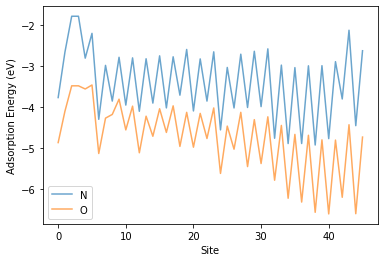

In [8]:
### Plot all adsorption energies
### To see some information on what each prediction corresponds to, examine descripList
predAdsEnNListFlat = [item for sublist in np.array(predAdsList)[:,0] for item in sublist]
predAdsEnOListFlat = [item for sublist in np.array(predAdsList)[:,1] for item in sublist]
plt.plot(range(len(predAdsEnNListFlat)),predAdsEnNListFlat,alpha=0.66)
plt.plot(range(len(predAdsEnOListFlat)),predAdsEnOListFlat,alpha=0.66)
plt.xlabel('Site')
plt.ylabel('Adsorption Energy (eV)')
plt.legend(['N','O'])
plt.show()

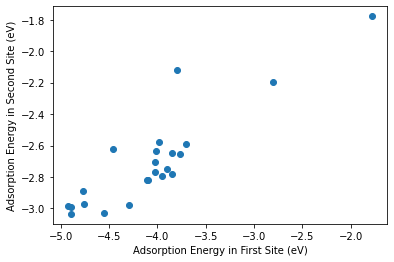

In [9]:
### Compare the two sites.
#Just N in first site:
predAdsEnNFirstSite = np.array(predAdsList)[:,0,0]
#Just N in second site:
predAdsEnNSecondSite = np.array(predAdsList)[:,0,1]
plt.scatter(predAdsEnNFirstSite,predAdsEnNSecondSite)
plt.xlabel('Adsorption Energy in First Site (eV)')
plt.ylabel('Adsorption Energy in Second Site (eV)')
plt.show()